## Data loading and visualization

100%|██████████| 149M/149M [00:01<00:00, 103MB/s]

Extracting files...


Train dataset
 Dataset ImageFolder
    Number of datapoints: 5712
    Root location: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

Test  dataset
 Dataset ImageFolder
    Number of datapoints: 1311
    Root location: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

Figure number: 1500  |  Class: 1 - meningioma


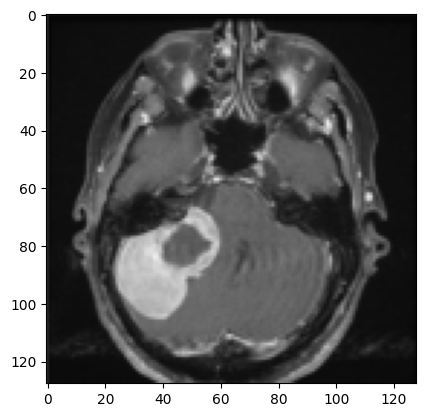

In [1]:
import kagglehub
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#Download datasets paths
dataset_path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

#Data scaler - fix images sizes
scaling = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

#Train-Test splitting
training_dataset_path = dataset_path + "/Training"
test_dataset_path = dataset_path + "/Testing"
train_dataset = datasets.ImageFolder(root = training_dataset_path, transform=scaling)
test_dataset = datasets.ImageFolder(root = test_dataset_path, transform=scaling)
print("Train dataset\n", train_dataset, end='\n\n')
print("Test  dataset\n", test_dataset,  end='\n\n')

#Train-Test DataLoaders
bs = 32
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=True)

#Show a random image of the train dataset
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

idx = 1500
print(f'Figure number: {idx}  |  Class: {train_dataset[idx][1]} - {train_dataset.classes[train_dataset[idx][1]]}')
imshow(train_dataset[idx][0])


## CNN Architecture

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Brain_Tumor_CNN(nn.Module):
    def __init__(self):
        super(Brain_Tumor_CNN, self).__init__()

        #Architecture
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.Linear(in_features=256*32*32, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=4)
        )

    def forward(self, x):
        return self.network(x)

#Define the CNN
model = Brain_Tumor_CNN()
print(model, end='\n\n')

#Try a random batch
exmpl = torch.randn(32, 3, 128, 128)
output = model(exmpl)
print(output.shape)

Brain_Tumor_CNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=262144, out_features=512, bias=True)
    (12): ReLU()
    (13): Linear(in_features=512, out_features=128, bias=True)
    (14): ReLU()
    (15): Linear(in_features=128, out_features=4, bias=True)
  )
)

torch.Size([32, 4])


##Training

Device: cuda
Epoch: 1/20 | Train Loss: 0.7087 | Train Accuracy: 71.24% | Test Loss: 0.5713 | Test Accuracy: 76.81%
Epoch: 2/20 | Train Loss: 0.3330 | Train Accuracy: 87.61% | Test Loss: 0.3135 | Test Accuracy: 86.96%
Epoch: 3/20 | Train Loss: 0.2098 | Train Accuracy: 92.47% | Test Loss: 0.2250 | Test Accuracy: 91.08%
Epoch: 4/20 | Train Loss: 0.1182 | Train Accuracy: 95.85% | Test Loss: 0.1879 | Test Accuracy: 93.67%
Epoch: 5/20 | Train Loss: 0.0815 | Train Accuracy: 97.30% | Test Loss: 0.1480 | Test Accuracy: 95.58%
Epoch: 6/20 | Train Loss: 0.0736 | Train Accuracy: 97.44% | Test Loss: 0.2048 | Test Accuracy: 92.91%
Epoch: 7/20 | Train Loss: 0.0309 | Train Accuracy: 98.84% | Test Loss: 0.1589 | Test Accuracy: 96.49%
Epoch: 8/20 | Train Loss: 0.0209 | Train Accuracy: 99.25% | Test Loss: 0.1575 | Test Accuracy: 96.34%
Epoch: 9/20 | Train Loss: 0.0150 | Train Accuracy: 99.47% | Test Loss: 0.2222 | Test Accuracy: 95.35%
Epoch: 10/20 | Train Loss: 0.0409 | Train Accuracy: 98.67% | Test Los

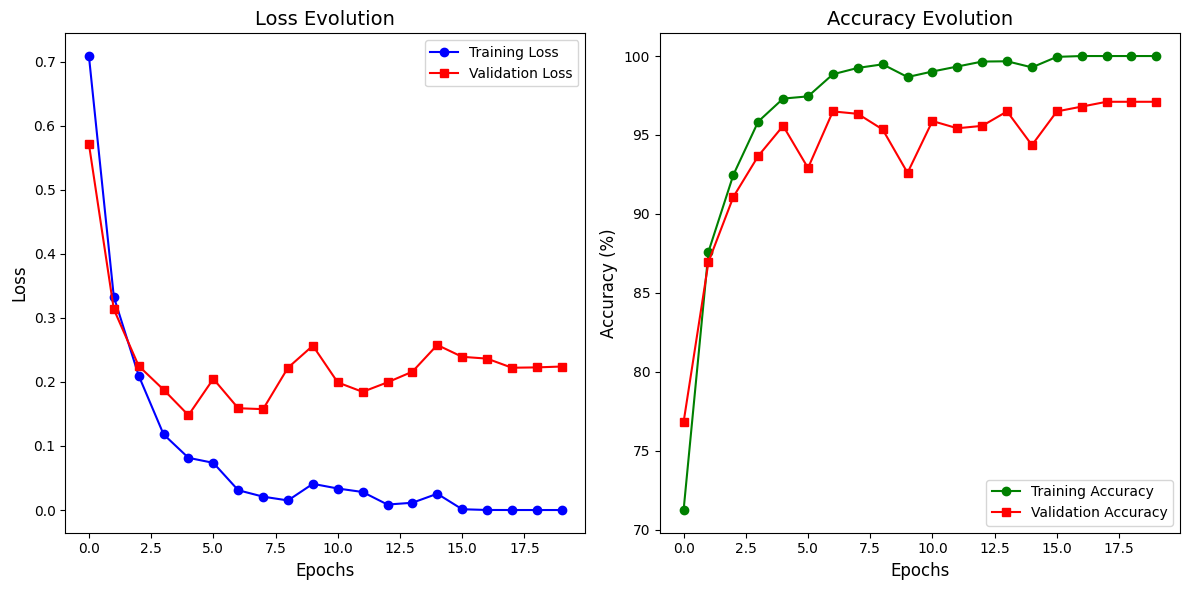

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#Set the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')

#Optimizer
model = Brain_Tumor_CNN().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Function to compute accuracy on test set
def eval(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = loss_function(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #Return metrics
    test_accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)
    return test_loss, test_accuracy


#Function to do the training
def train(model, train_loader, test_loader, epochs=20):

    #Define evaluation values
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    #Train
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        #Run over batches
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        #Metrics
        train_accuracies.append(100 * correct / total)
        train_losses.append(train_loss / len(train_loader))

        val_loss, val_accuracy = eval(model, test_loader)
        test_losses.append(val_loss)
        test_accuracies.append(val_accuracy)

        #Print evolution
        print(f'Epoch: {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accuracies[-1]:.2f}% | Test Loss: {test_losses[-1]:.4f} | Test Accuracy: {test_accuracies[-1]:.2f}%')

    return train_losses, train_accuracies, test_losses, test_accuracies


#Run the training
train_losses, train_accuracies, test_losses, test_accuracies = train(model, train_loader, test_loader, epochs=20)

#Plot erros and accuracies
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Losses
axs[0].plot(train_losses, label="Training Loss", color="blue", marker="o")
axs[0].plot(test_losses, label="Validation Loss", color="red", marker="s")
axs[0].set_title("Loss Evolution", fontsize=14)
axs[0].set_xlabel("Epochs", fontsize=12)
axs[0].set_ylabel("Loss", fontsize=12)
axs[0].legend()

#Accuracies
axs[1].plot(train_accuracies, label="Training Accuracy", color="green", marker="o")
axs[1].plot(test_accuracies, label="Validation Accuracy", color="red", marker="s")
axs[1].set_title("Accuracy Evolution", fontsize=14)
axs[1].set_xlabel("Epochs", fontsize=12)
axs[1].set_ylabel("Accuracy (%)", fontsize=12)
axs[1].legend()

# Adjust layout and show
plt.tight_layout()
plt.show()

#Save results
torch.save(model.state_dict(), 'model.pth')
np.save('train_losses.npy', train_losses)
np.save('train_accuracies.npy', train_accuracies)
np.save('test_losses.npy', test_losses)
np.save('test_accuracies.npy', test_accuracies)


## Results Analysis

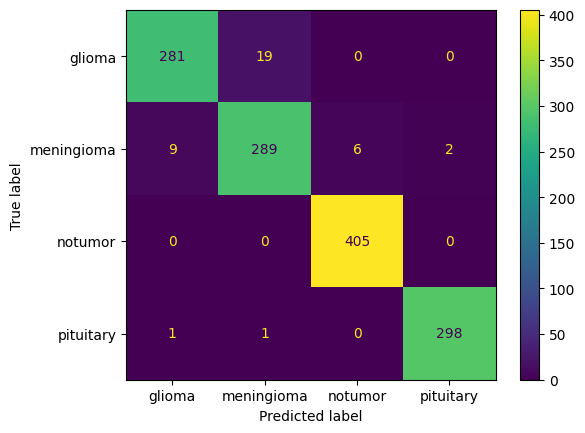

In [10]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()
predicts = []
targs = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = outputs.max(1)
        predicts.extend(preds.cpu().numpy())
        targs.extend(labels.cpu().numpy())

#Plotting
cm = confusion_matrix(targs, predicts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
disp.plot(cmap="viridis")
plt.show()


## Hyperparameters Tunning

Device: cuda

Training with learning rate: 0.0001

Training with learning rate: 0.001

Training with learning rate: 0.01

Training with learning rate: 0.1


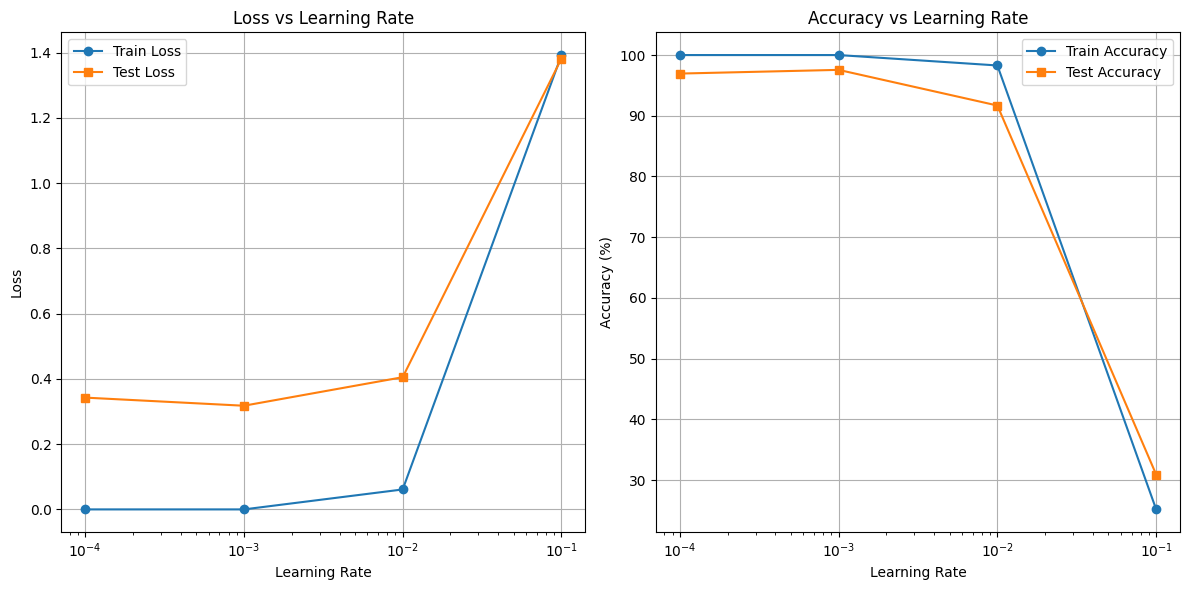

In [12]:
import torch
from torch.optim import Adam
import matplotlib.pyplot as plt
import copy

def training_lr(model, train_loader, test_loader, lr_values, num_epochs=20, device="cuda" if torch.cuda.is_available() else "cpu"):

    print(f'Device: {device}')
    results = {"lr": [], "train_loss": [], "test_loss": [], "train_acc": [], "test_acc": []}

    for lr in lr_values:
        print(f"\nTraining with learning rate: {lr}")

        #Start with the same model
        model_lr = copy.deepcopy(model).to(device)

        #Define optimizer
        optimizer = Adam(model_lr.parameters(), lr=lr)
        criterion = torch.nn.CrossEntropyLoss()

        #Metrics
        train_loss, test_loss = [], []
        train_acc, test_acc = [], []

        #Train
        for epoch in range(num_epochs):
            model_lr.train()
            running_loss, correct, total = 0.0, 0, 0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model_lr(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

            train_loss.append(running_loss / len(train_loader.dataset))
            train_acc.append(100 * correct / total)

            #Evaluation
            model_lr.eval()
            running_loss, correct, total = 0.0, 0, 0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)

                    outputs = model_lr(inputs)
                    loss = criterion(outputs, labels)
                    running_loss += loss.item() * inputs.size(0)
                    _, predicted = outputs.max(1)
                    total += labels.size(0)
                    correct += predicted.eq(labels).sum().item()

            test_loss.append(running_loss / len(test_loader.dataset))
            test_acc.append(100 * correct / total)

        #Store metrics
        results["lr"].append(lr)
        results["train_loss"].append(train_loss[-1])
        results["test_loss"].append(test_loss[-1])
        results["train_acc"].append(train_acc[-1])
        results["test_acc"].append(test_acc[-1])

    return results

#Evaluate
lr_values = [1e-4, 1e-3, 1e-2, 1e-1]
results = training_lr(model, train_loader, test_loader, lr_values)

#Save results
np.save('train_loss_lr.npy', results["train_loss"])
np.save('test_loss_lr.npy', results["test_loss"])
np.save('train_acc_lr.npy', results["train_acc"])
np.save('test_acc_lr.npy', results["test_acc"])

#Plottting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results["lr"], results["train_loss"], label="Train Loss", marker="o")
plt.plot(results["lr"], results["test_loss"], label="Test Loss", marker="s")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(results["lr"], results["train_acc"], label="Train Accuracy", marker="o")
plt.plot(results["lr"], results["test_acc"], label="Test Accuracy", marker="s")
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Learning Rate")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()